#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [1]:
# Import sys so we can import custom packages without error
import sys
sys.path.append('../')

In [2]:
# Import Pandas and Numpy to deal with DataFrames and NaN
import pandas as pd
import numpy as np

# Import visualizing library
from src.modules.figure_generation import *

In [4]:
# Pull the data from csv by concatenating current working directory with
# '/data/flights_10000.csv'
data = pd.read_csv('../data/flights_10000.csv')

In [5]:
# First, we can convert the column dtype for the date from Object to datetime64
data['fl_date'] = pd.to_datetime(data['fl_date'])

In [6]:
# Create DF with year column, delay columns, diverted and cancellation
df_delays = data.loc[:, ['fl_date', 'dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'diverted', 'cancelled']]

In [7]:
# We know everything is numeric, so we can fill NaN with 0s
df_delays = df_delays.fillna(0)

In [8]:
# Group by year, month. Calculate sum for the departure and arrival delay columns. Include delay type columns for more insight.
delays_grouped = df_delays.groupby([df_delays['fl_date'].dt.year.rename('Year'),
                                    df_delays['fl_date'].dt.month.rename('Month')])[['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', ]].sum().reset_index()

In [23]:
#store the mean of our delay totals in a new column for each month
delays_grouped['month_delay_avg'] = delays_grouped[['dep_delay', 'arr_delay']].mean(axis=1)

In [24]:
#Sort DataFrame based on new month_delay_avg column in descending order
print("Delay Times in Minutes:")
delays_grouped[['Year', 'Month', 'month_delay_avg']].sort_values(['month_delay_avg'], ascending=False)

Delay Times in Minutes:


,Year,Month,month_delay_avg
18,2019,7,6254.0
13,2019,2,5310.0
17,2019,6,4974.0
4,2018,5,4667.5
16,2019,5,4132.0
3,2018,4,4051.0
12,2019,1,3936.0
6,2018,7,3934.5
7,2018,8,3819.0
10,2018,11,3785.0


The average monthy delay is quite different throughout the year, with the top five averages consisting in large part of the summer months. This could be due to a multitude of factors, a prime example being summer vacation traffic.

#### DataViz

In [25]:
months_grouped = delays_grouped.groupby(['Month'], as_index=False)['month_delay_avg'].mean()

In [27]:
months_grouped.sort_values(['month_delay_avg'], ascending=False)

,Month,month_delay_avg
6,7,5094.25
4,5,4399.75
5,6,4234.25
1,2,3717.25
7,8,3489.25
3,4,3380.25
0,1,2962.75
2,3,2872.75
11,12,2662.75
10,11,2469.50


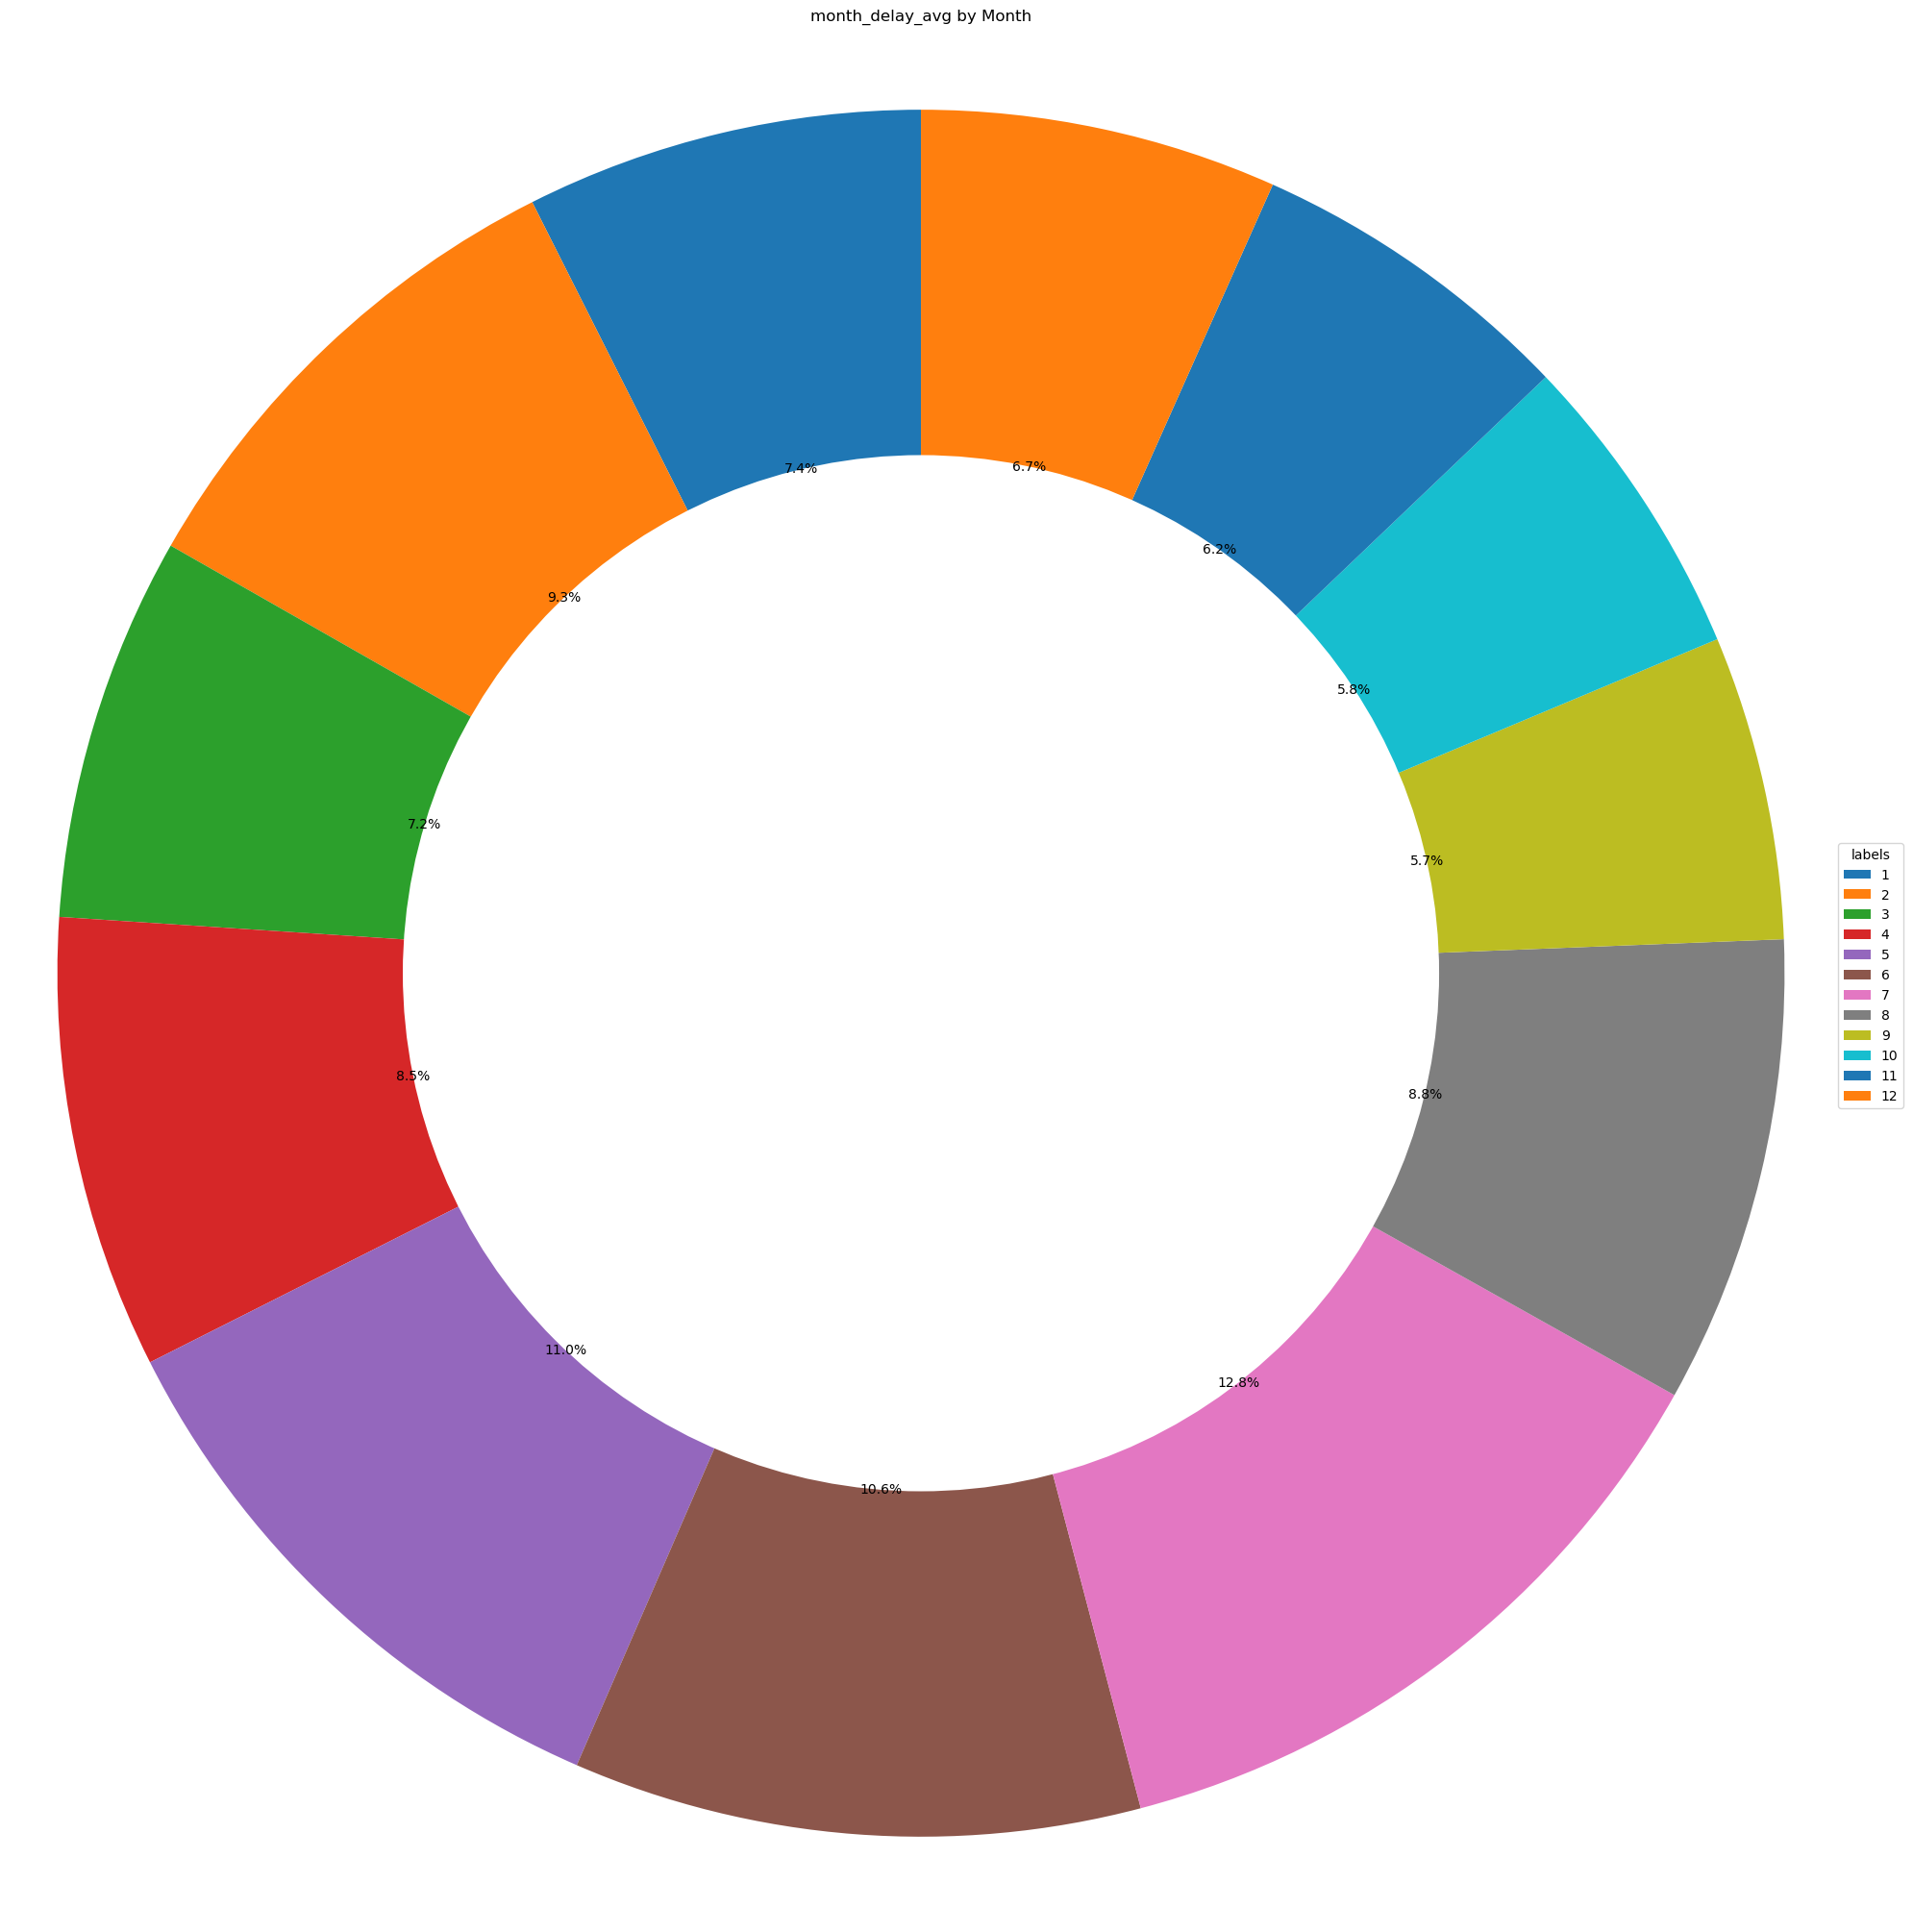

<Figure size 640x480 with 0 Axes>

In [28]:
make_donut(months_grouped, 'Month', 'month_delay_avg')